In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import pickle

In [2]:
df = pd.read_csv('../data/clean_housing.csv')

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [5]:
df_ml = df.copy()

In [6]:
df_ml.ocean_proximity = df.ocean_proximity.replace({'NEAR BAY':0, '<1H OCEAN':1, 'INLAND':2, 'NEAR OCEAN':3, 'ISLAND':4})

In [7]:
df_ml

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,2


In [8]:
df_ml.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [9]:
df_X = df_ml[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income','ocean_proximity']]

In [10]:
df_y = df_ml['median_house_value']

In [11]:
df_y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [12]:
df_X

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,0
...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,2
20636,18.0,697.0,150.0,356.0,114.0,2.5568,2
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,2
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,2


In [13]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=9, shuffle=True)

In [14]:
X_test

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
20558,10.0,2086.0,380.0,1073.0,378.0,4.5526,2
11430,22.0,3914.0,600.0,1871.0,607.0,5.8541,1
2656,32.0,1430.0,419.0,434.0,187.0,1.9417,3
14267,37.0,2395.0,627.0,2489.0,599.0,1.5933,3
3684,36.0,1392.0,326.0,1181.0,303.0,3.1563,1
...,...,...,...,...,...,...,...
14222,22.0,3362.0,630.0,1471.0,612.0,4.1442,3
6039,33.0,1025.0,261.0,854.0,269.0,2.2596,2
8251,26.0,3042.0,1253.0,4812.0,1141.0,1.7701,3
13337,27.0,574.0,103.0,321.0,103.0,3.9107,2


In [15]:
reg = RandomForestRegressor(random_state=9, n_estimators=200)

In [16]:
reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=9)

In [17]:
filename = 'modelo_dataway.pkl'
pickle.dump(reg, open(filename, 'wb'))

In [19]:
y_pred = reg.predict(X_test)

In [20]:
y_test

20558    154400.0
11430    281500.0
2656      76100.0
14267     86300.0
3684     176400.0
           ...   
14222    303900.0
6039     119400.0
8251     146200.0
13337    186500.0
12432    100000.0
Name: median_house_value, Length: 4128, dtype: float64

In [21]:
mean_absolute_error(y_test, y_pred)

43392.854200581394

In [22]:
X_test['error'] = abs(y_test - y_pred)

<Axes: xlabel='ocean_proximity', ylabel='error'>

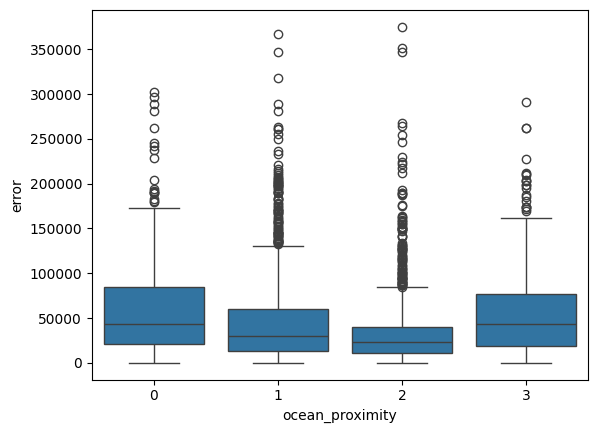

In [24]:
sns.boxplot(data=X_test, x='ocean_proximity', y='error')

<Axes: xlabel='error', ylabel='Count'>

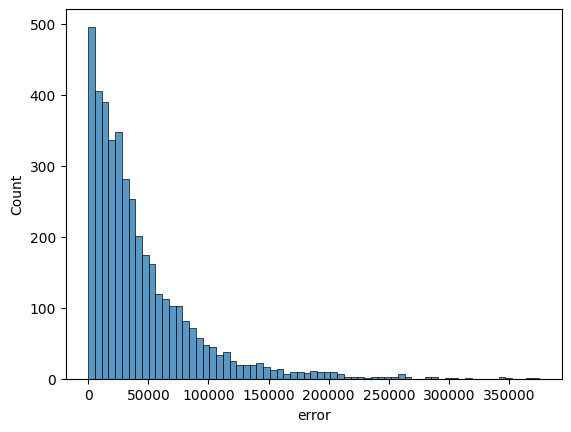

In [25]:
sns.histplot(data=X_test, x='error')

In [26]:
X_test.query('error > 200000')

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,error
4351,36.0,2963.0,838.000000,1129.0,745.0,2.5588,1,233286.950
17478,28.0,1062.0,309.000000,1058.0,305.0,1.5071,3,212240.500
10709,25.0,1949.0,459.000000,602.0,428.0,2.7601,1,213811.775
5307,18.0,4780.0,1192.000000,1886.0,1036.0,4.4674,1,212375.475
15856,52.0,248.0,68.000000,124.0,51.0,1.4886,0,289146.430
14545,15.0,1036.0,149.000000,395.0,157.0,5.8343,3,261749.990
9192,34.0,503.0,99.000000,275.0,68.0,4.5491,2,212030.915
18383,45.0,1797.0,303.000000,870.0,281.0,4.5417,1,207308.495
5449,31.0,1930.0,456.000000,1002.0,410.0,3.9798,1,209101.000
2969,18.0,4070.0,512.000000,1580.0,540.0,10.5941,2,217479.405
